In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pickle
from collections import defaultdict


In [3]:
def read_label_results(name):
    labeled_indices_mean = np.load(f'counts_mean_{name}.npy')
    labeled_indices_stsd = np.load(f'counts_std_{name}.npy')
    return labeled_indices_mean, labeled_indices_stsd

labeled_indices = defaultdict(dict)
name = ['coreset','label_dispersion','corelb','random','coreset_adv_sampling','coreset_full_epochs','corelbpseudo'] #add corepseudo
for n in name:
    mean,std = read_label_results(n)
    labeled_indices[n]['mean'] = mean
    labeled_indices[n]['std'] = std


/var/folders/5f/83w09gxd6pq0h169x9168wcw0000gn/T/ipykernel_38646/94518661.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(species_name,rotation=90)


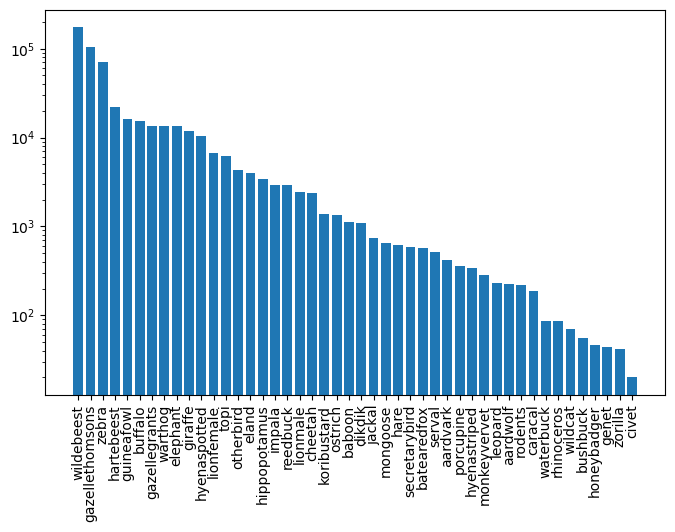

In [6]:
df_test = pd.read_pickle('/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_metadata_test.df')
df_train = pd.read_pickle('/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_metadata_unique_train.df')
lut = pd.read_pickle('/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_category_lut_adapted.df')

category_test, num_test = zip(*list(df_test['category_id'].value_counts().items()))
tmp_test = [(i,j) for i,j in zip(category_test,num_test)]
tmp_test = sorted(tmp_test,key=lambda x:x[0],reverse=False)

category_train, num_train = zip(*list(df_train['category_id'].value_counts().items()))
tmp_train = [(i,j) for i,j in zip(category_train,num_train)]
tmp_train = sorted(tmp_train,key=lambda x:x[0],reverse=False)

combo_sorted = [(i[0],j[1]) for i,j in zip(tmp_test,tmp_train)] #separate category and num
combo_sorted = sorted(combo_sorted,key=lambda x:x[1],reverse=True)
category, num  = zip(*combo_sorted)

num = np.array(num_train)
category = np.array(category_test)

sorted_a = np.argsort(category)
species_name = [lut.name[i] for i in category]
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(species_name,num,log=True)
ax.set_xticklabels(species_name,rotation=90)
plt.show()

In [217]:
labeled_indices['corelb']['mean'][category]

array([8.447e+02, 3.474e+02, 5.151e+02, 6.120e+01, 5.370e+01, 1.075e+02,
       6.580e+01, 6.000e+01, 7.620e+01, 6.550e+01, 3.220e+01, 2.930e+01,
       1.730e+01, 2.250e+01, 2.020e+01, 6.900e+00, 7.900e+01, 1.500e+01,
       6.400e+00, 9.900e+00, 5.200e+00, 4.600e+00, 1.280e+01, 1.210e+01,
       2.400e+00, 1.100e+00, 3.100e+00, 3.400e+00, 2.000e+00, 2.000e+00,
       1.400e+00, 1.600e+00, 8.000e-01, 3.100e+00, 1.200e+00, 7.000e-01,
       8.000e-01, 6.000e-01, 2.100e+00, 3.000e-01, 4.000e-01, 1.700e+00,
       5.000e-01, 2.000e-01, 1.000e-01, 0.000e+00])

In [283]:
labeled_indices.keys()

dict_keys(['coreset', 'labeldispersion', 'corelb', 'rnd', 'corelbpseudo', 'coreset_adv_samp'])

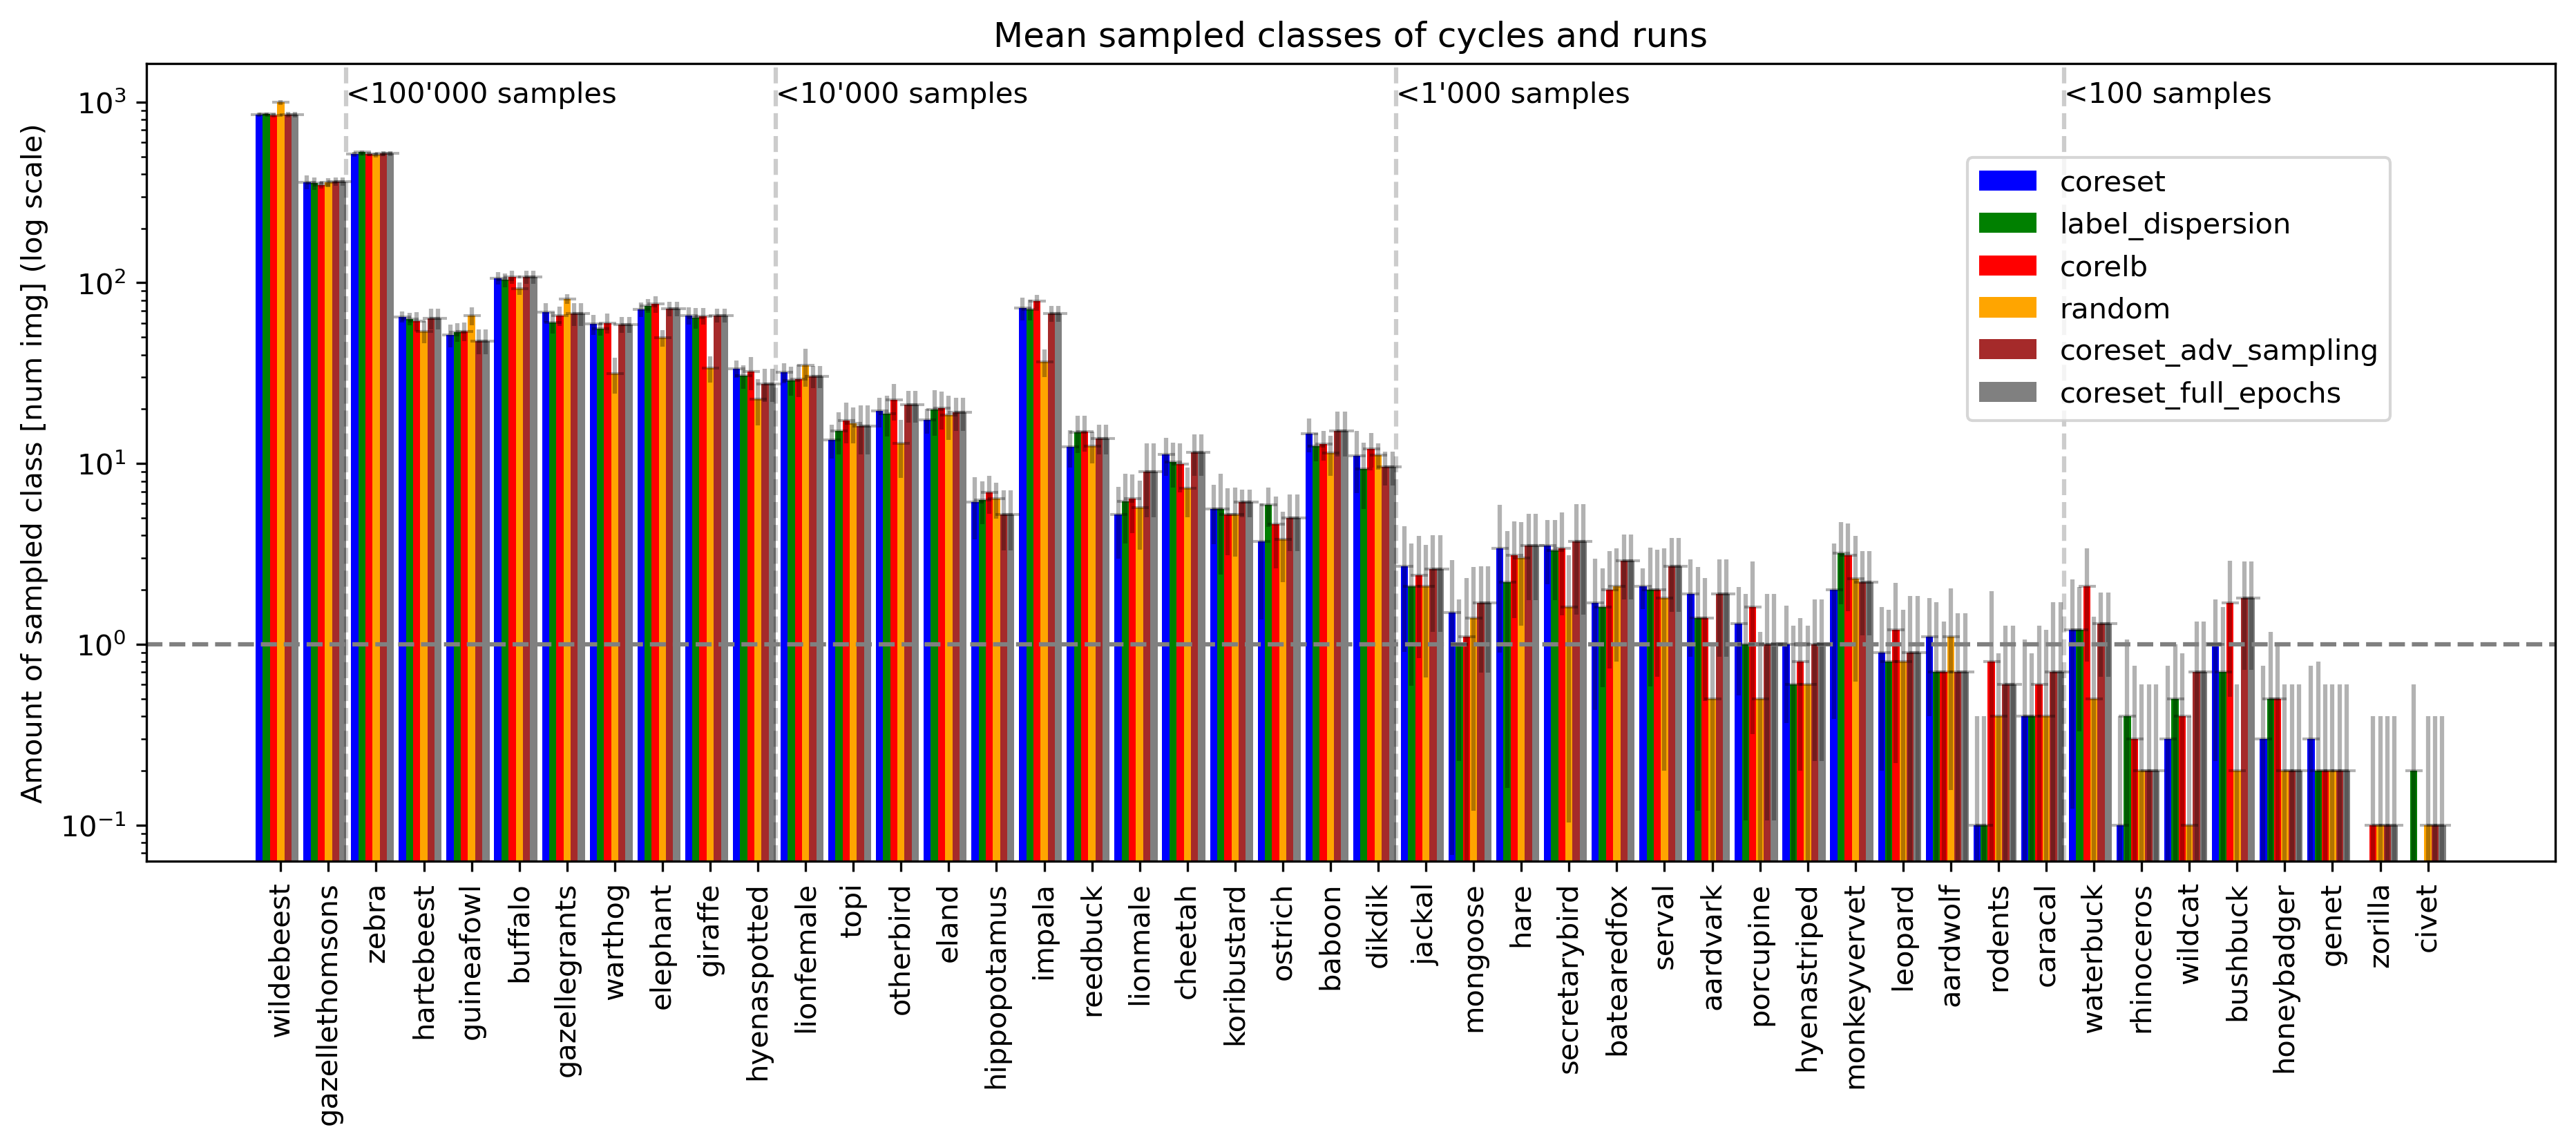

In [7]:
color = ['blue','orange','green','red','purple','brown','pink','gray','olive','cyan']
sampling_strat = ['coreset','random','label_dispersion','corelb','corelbpseudo','coreset_adv_sampling','label_dispersion_adv_sampling','coreset_full_epochs','coreset_full_aug_epochs']
color_map = dict(zip(sampling_strat, color))

x = np.arange(46)
x = np.linspace(0,60,46)
# Create the plot
fig, ax = plt.subplots(figsize=(15,5),dpi=300)
bar_width = np.arange(-0.6,0.6,0.2)
# Plot each set of bars with an offset on the x-axis

for i in range(len(labeled_indices.keys())):
    if name[i] == 'corelbpseudo':
        continue
    ax.bar(x + bar_width[i], labeled_indices[name[i]]['mean'][category], width=0.2, label=name[i],log=False,color=color_map[name[i]])
    ax.errorbar(x + bar_width[i], labeled_indices[name[i]]['mean'][category], yerr=labeled_indices[name[i]]['std'][category], fmt='_', color='black',alpha=0.3)

thr = [1.4,10.4,23.4,37.4]*2
thr = [x[1]+0.5,x[10]+0.5,x[23]+0.5,x[37]+0.5] 
thr_txt = ['<100\'000 samples', '<10\'000 samples', '<1\'000 samples', '<100 samples']
for i,j in (zip(thr,thr_txt)):
    ax.axvline(x=i, color='black', linestyle='--',alpha=0.2)
    ax.text (i, 1e3, j, rotation = 0)

ax.set_xticks(x)
ax.set_xticklabels(species_name,rotation=90)
# ax.set_ylim(0,5)
ax.axhline(y=1, color='grey', linestyle='--')
ax.set_ylabel('Amount of sampled class [num img] (log scale)')
ax.legend(loc='upper left',bbox_to_anchor=(0.75,0.9))
ax.set_title(f'Mean sampled classes of cycles and runs')
ax.set_yscale('log')
# plt.savefig(f'plots/sampled_classses_absolute.png',bbox_inches='tight')

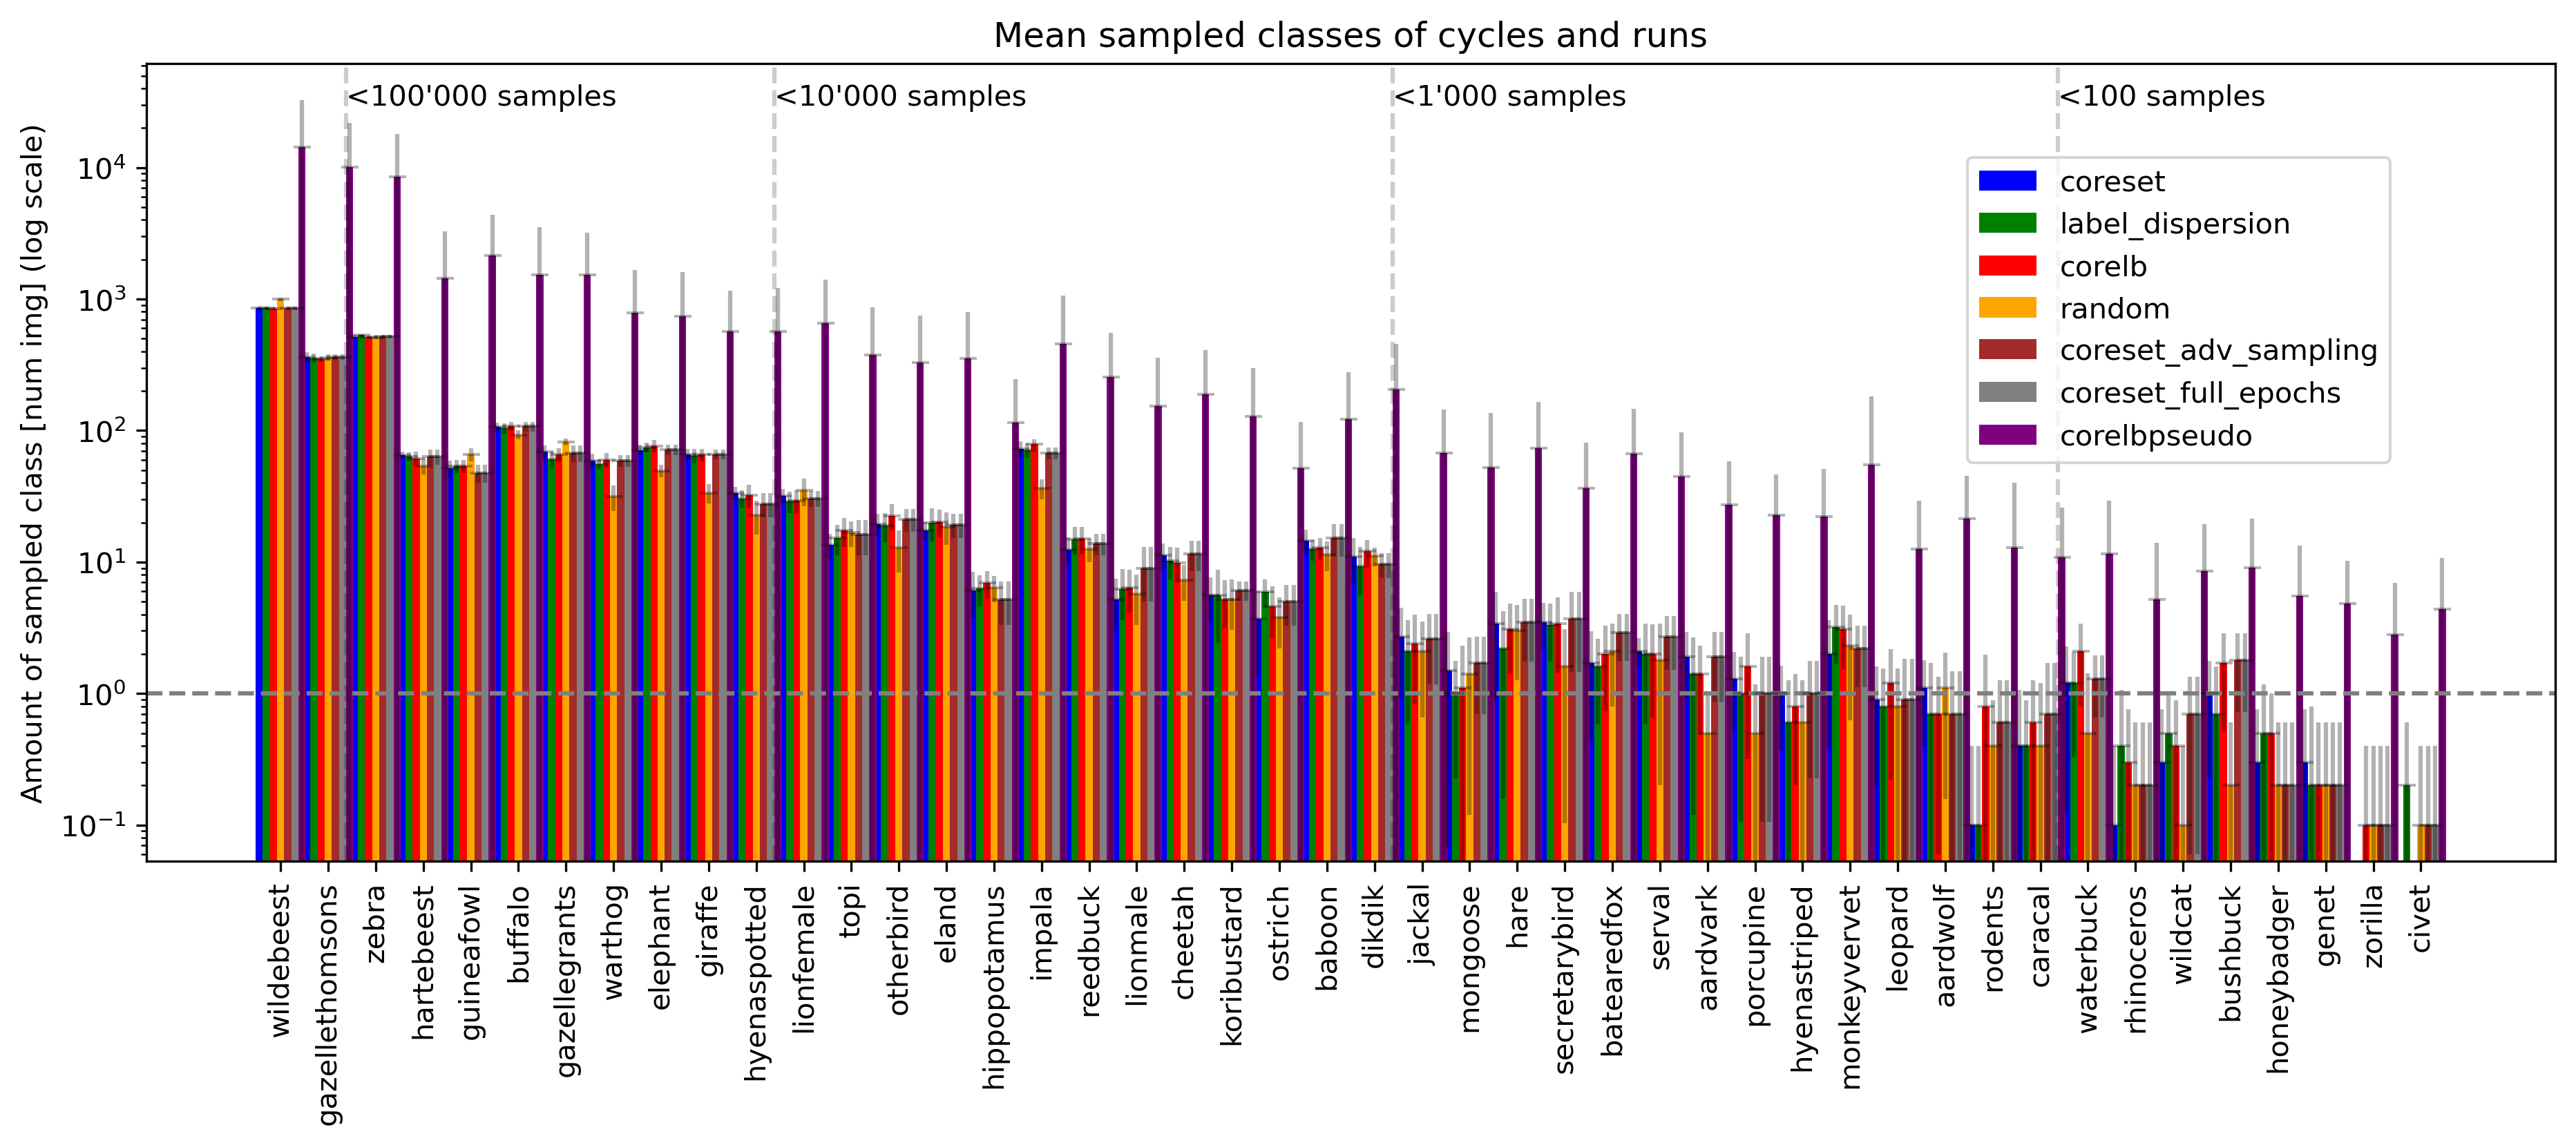

In [355]:
color = ['blue','orange','green','red','purple','brown','pink','gray','olive','cyan']
sampling_strat = ['coreset','random','label_dispersion','corelb','corelbpseudo','coreset_adv_sampling','label_dispersion_adv_sampling','coreset_full_epochs','coreset_full_aug_epochs']
color_map = dict(zip(sampling_strat, color))

x = np.arange(46)
x = np.linspace(0,60,46)
# Create the plot
fig, ax = plt.subplots(figsize=(15,5),dpi=300)
bar_width = np.arange(-0.6,0.8,0.2)
# Plot each set of bars with an offset on the x-axis

for i in range(len(labeled_indices.keys())):
    if name[i] == 'corelbpseudo':
        pass
    ax.bar(x + bar_width[i], labeled_indices[name[i]]['mean'][category], width=0.2, label=name[i],log=False,color=color_map[name[i]])
    ax.errorbar(x + bar_width[i], labeled_indices[name[i]]['mean'][category], yerr=labeled_indices[name[i]]['std'][category], fmt='_', color='black',alpha=0.3)

thr = [1.4,10.4,23.4,37.4]*2
thr = [x[1]+0.5,x[10]+0.5,x[23]+0.5,x[37]+0.5] 
thr_txt = ['<100\'000 samples', '<10\'000 samples', '<1\'000 samples', '<100 samples']
for i,j in (zip(thr,thr_txt)):
    ax.axvline(x=i, color='black', linestyle='--',alpha=0.2)
    ax.text (i, 3e4, j, rotation = 0)

ax.set_xticks(x)
ax.set_xticklabels(species_name,rotation=90)
# ax.set_ylim(0,5)
ax.axhline(y=1, color='grey', linestyle='--')
ax.set_ylabel('Amount of sampled class [num img] (log scale)')
ax.legend(loc='upper left',bbox_to_anchor=(0.75,0.9))
ax.set_title(f'Mean sampled classes of cycles and runs')
ax.set_yscale('log')
plt.savefig(f'plots/sampled_classses_absolute_with_pseudo.png',bbox_inches='tight')

In [72]:
labeled_indices['corelb']['mean'][category]/ num * 100

array([0.48671572, 0.48947128, 0.48534466, 0.48892527, 0.47660746,
       0.52062739, 0.48532232, 0.4857609 , 0.45556052, 0.51124744,
       0.51689287, 0.48421053, 0.47774336, 0.52484255, 0.50690088,
       0.50305321, 0.51440329, 0.44244729, 0.49651211, 0.41544272,
       0.46852123, 0.51530993, 0.41516245, 0.47794118, 0.45515395,
       0.37037037, 0.50570962, 0.34482759, 0.54101222, 0.390625  ,
       0.50724638, 0.38888889, 0.32163743, 0.60498221, 0.68669528,
       0.53097345, 0.32258065, 0.43010753, 0.45977011, 0.69767442,
       1.12676056, 0.90909091, 0.43478261, 0.        , 0.71428571,
       0.5       ])

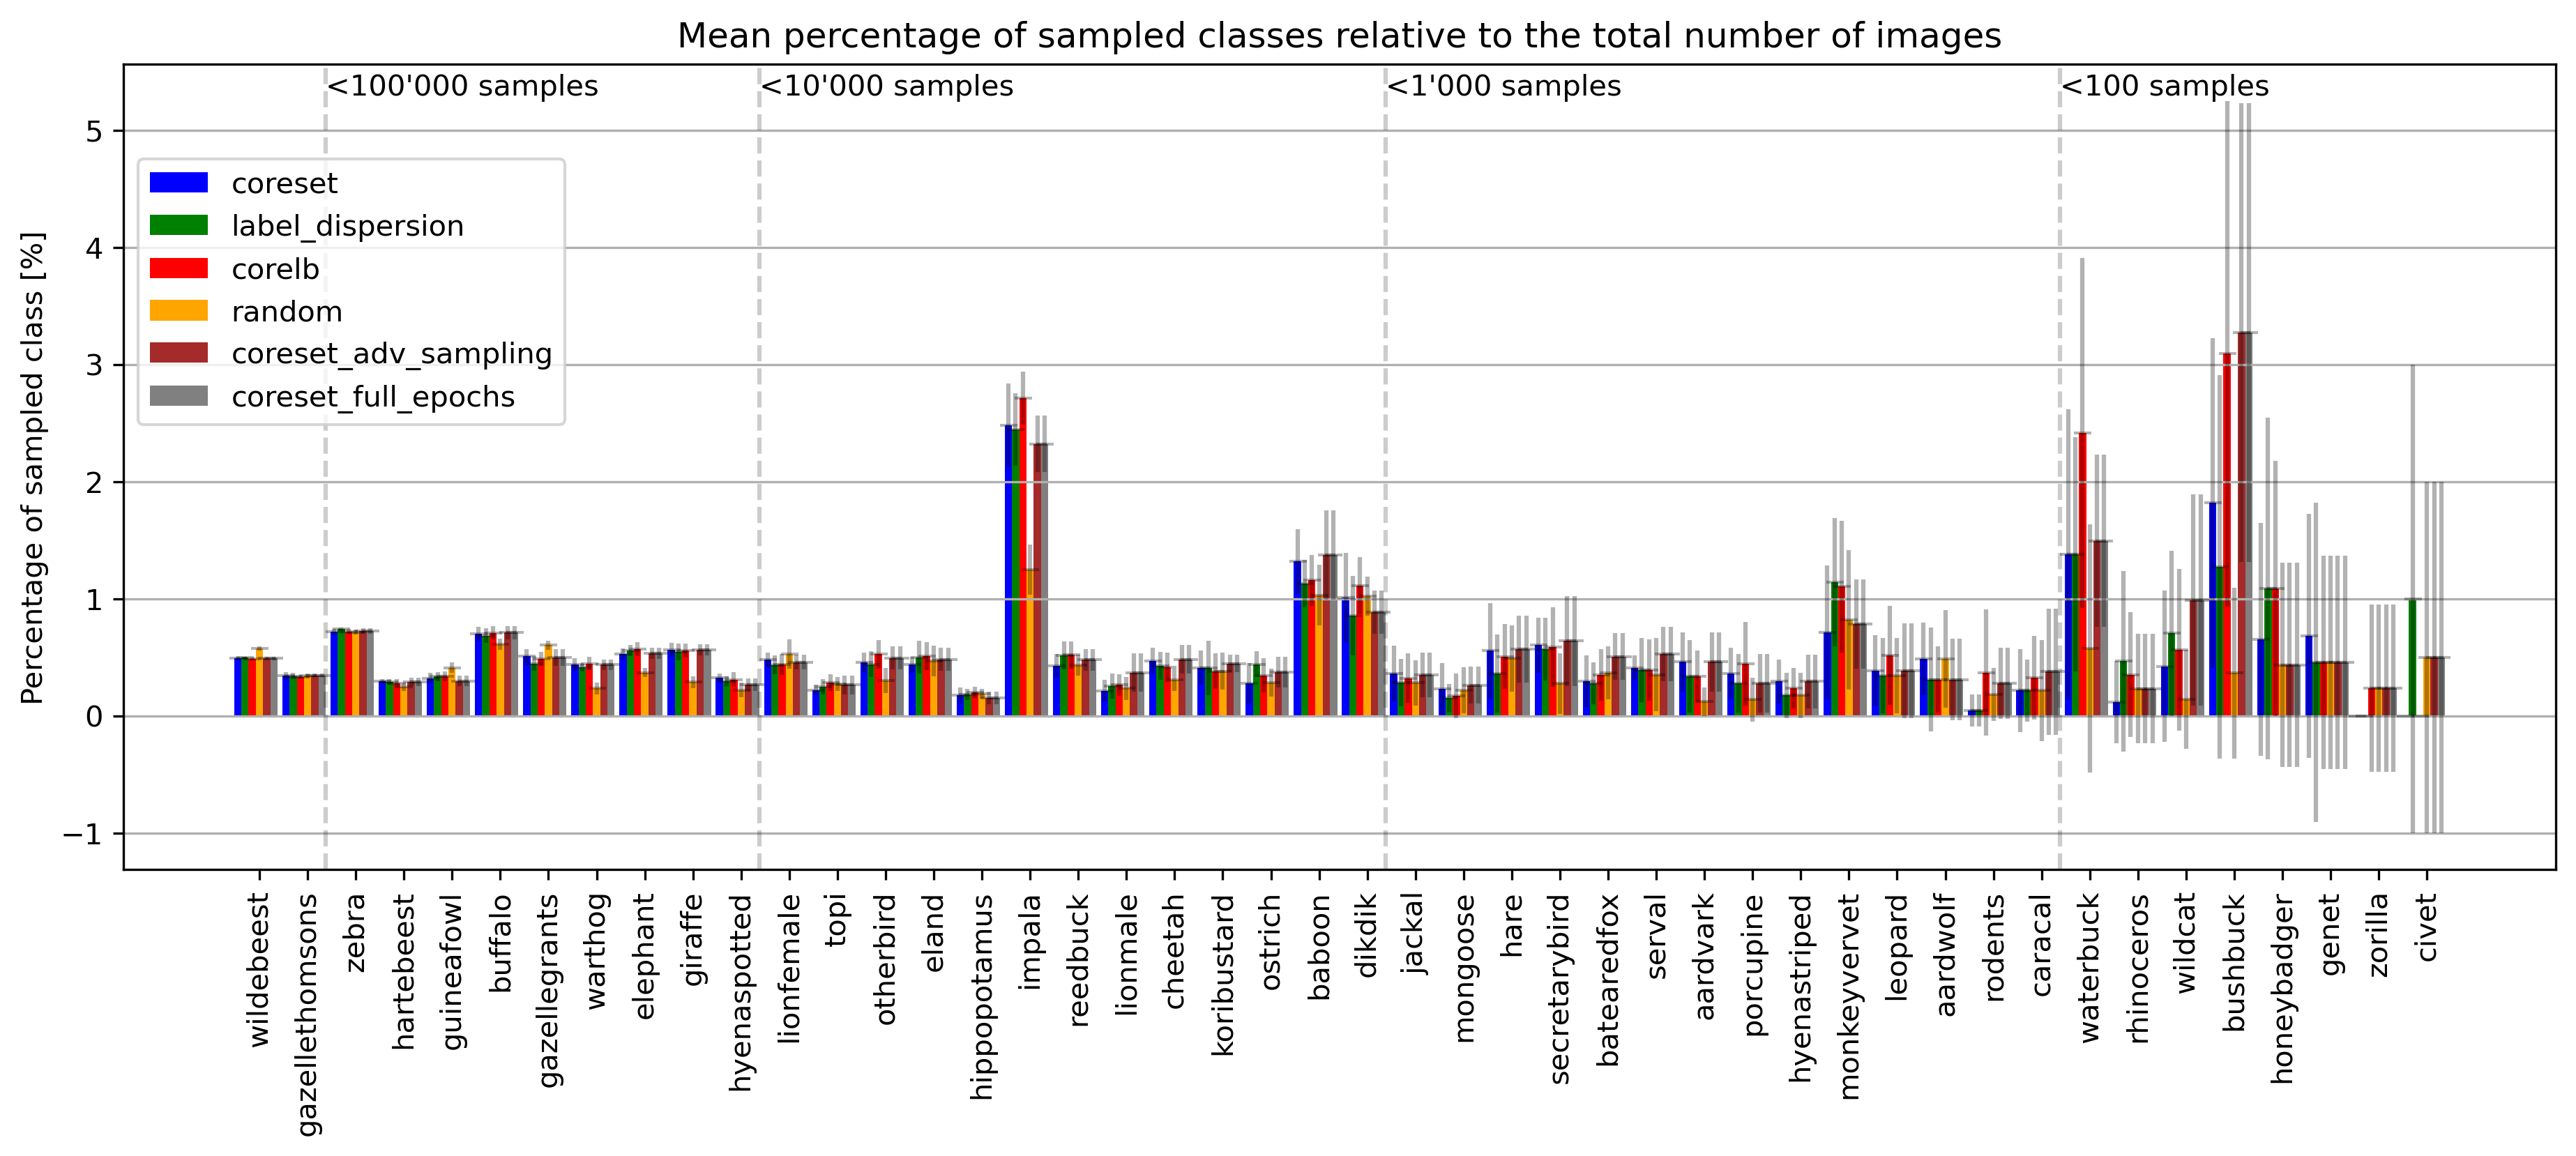

In [362]:
x = np.arange(0,92,2)
x = np.linspace(0,60,46)

# Create the plot
fig, ax = plt.subplots(figsize=(15,5),dpi=300)
bar_width = np.arange(-0.6,0.6,0.2)

for i in range(len(labeled_indices.keys())):
    if name[i] == 'corelbpseudo':
        continue
    ax.bar(x + bar_width[i], labeled_indices[name[i]]['mean'][category]/num*100, width=0.2, label=name[i],log=False,color=color_map[name[i]])
    ax.errorbar(x + bar_width[i], labeled_indices[name[i]]['mean'][category]/num*100, yerr=labeled_indices[name[i]]['std'][category]/num*100, fmt='_', color='black',alpha=0.3)
    
ax.set_xticks(x)
ax.set_xticklabels(species_name,rotation=90)
ax.set_ylabel('Percentage of sampled class [%]')

thr = [1.4,10.4,23.4,37.4]*2
thr = [x[1]+0.5,x[10]+0.5,x[23]+0.5,x[37]+0.5] 
thr_txt = ['<100\'000 samples', '<10\'000 samples', '<1\'000 samples', '<100 samples']
for i,j in (zip(thr,thr_txt)):
    ax.axvline(x=i, color='black', linestyle='--',alpha=0.2)
    ax.text (i, 5.3, j, rotation = 0)
# ax.axhline(y=1, color='grey', linestyle='--')
ax.legend(loc='upper left',bbox_to_anchor=(0,0.9))
ax.grid(axis='y')
ax.set_title(f'Mean percentage of sampled classes relative to the total number of images')
plt.savefig(f'plots/sampled_classses_percentage.png',bbox_inches='tight')

In [11]:
top = np.zeros((len(name)-1,len(category)))
for i, n in enumerate(name):
    if n == 'corelbpseudo':
        continue
    if n == 'coreset_adv_sampling' or n == 'coreset_full_epochs':
        continue
    print(n)
    for k,value, in enumerate(labeled_indices[n]['mean'][category]):
        top[i,k] = value


coreset
label_dispersion
corelb
random


In [ ]:
count = np.zeros(len(name)-1)
cumsum_matrix = np.zeros((len(category),len(name)-1))
a = 0
b = 46
for i in range(a,b,1):
    index = np.argmax(top[:,i])
    count[index] += 1
    cumsum_matrix[i,:] = count
print(count)
print(name[:-1])


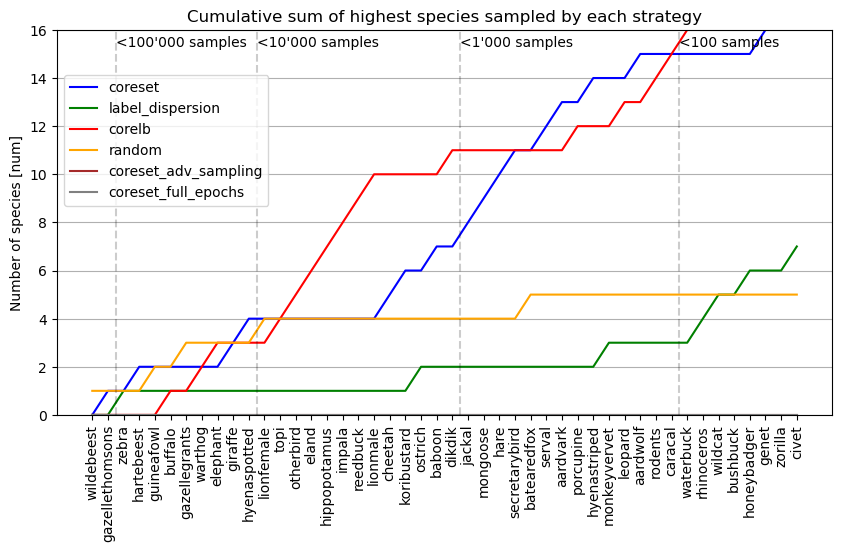

In [13]:
x = np.arange(46)
fig,ax = plt.subplots(figsize=(10,5))
for i in range(len(name)-1):
    ax.plot(x,cumsum_matrix[:,i],label=name[i],color=color_map[name[i]])

ax.set_xticks(x)
ax.set_xticklabels(species_name,rotation=90)
thr = [1.5,10.5,23.5,37.5]
thr_txt = ['<100\'000 samples', '<10\'000 samples', '<1\'000 samples', '<100 samples']
for i,j in (zip(thr,thr_txt)):
    ax.axvline(x=i, color='black', linestyle='--',alpha=0.2)
    ax.text (i, 15.3, j, rotation = 0)
ax.grid(axis='y')
ax.set_ylim(0,16)
ax.legend(loc='upper left',bbox_to_anchor=(0,0.9))
ax.set_title(f'Cumulative sum of highest species sampled by each strategy')
ax.set_ylabel('Number of species [num]')
plt.savefig(f'plots/cumulative_sum.png',bbox_inches='tight')    

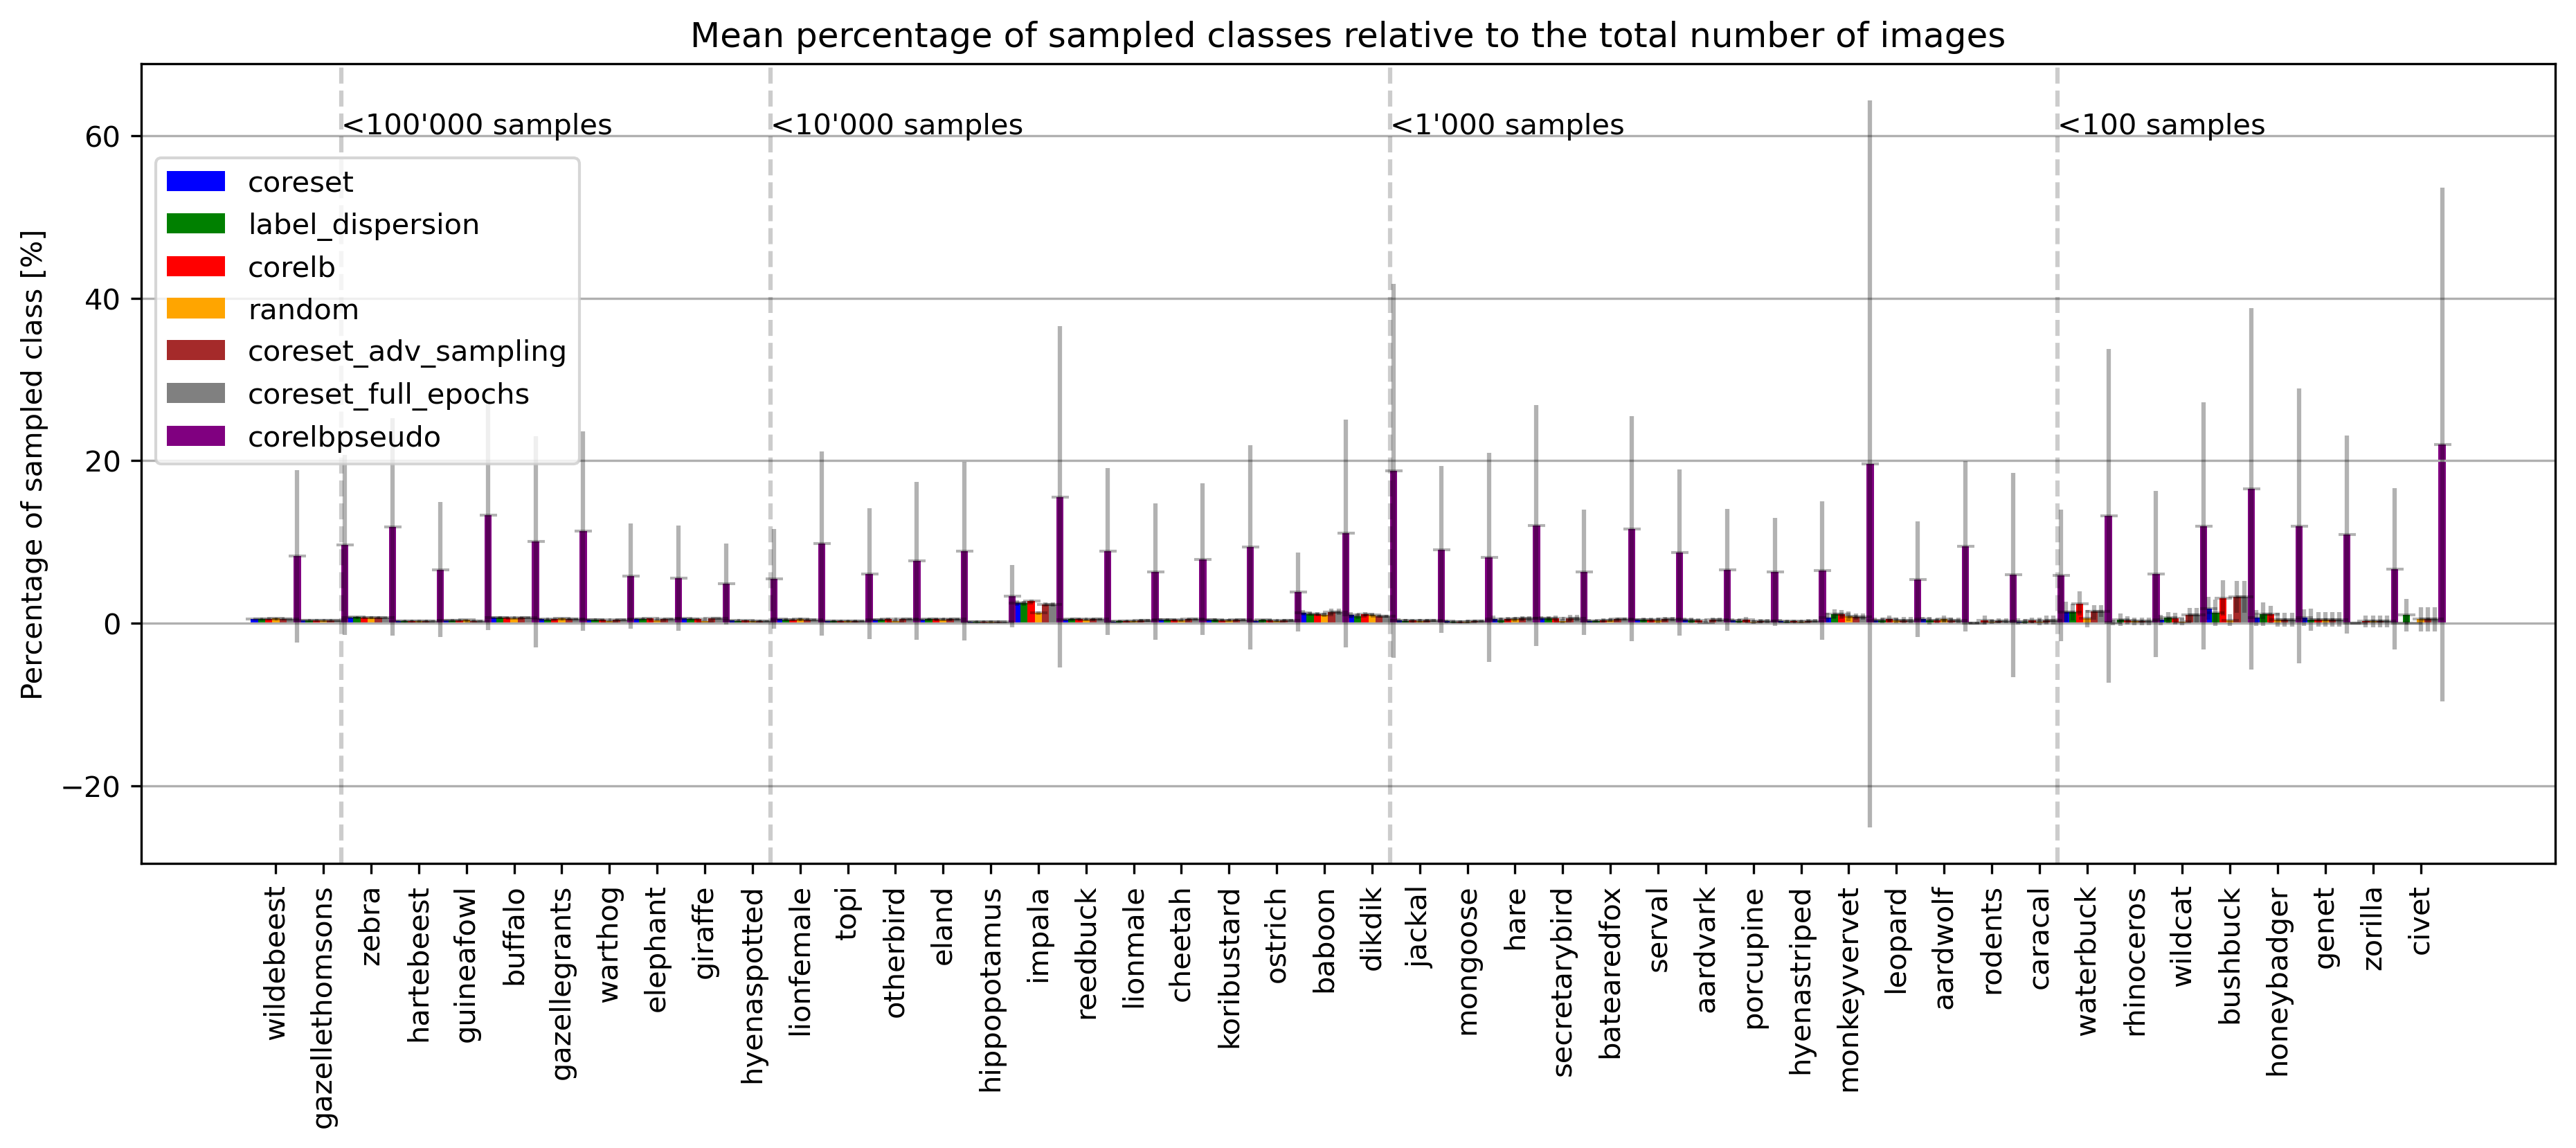

In [358]:
x = np.arange(0,92,2)
x = np.linspace(0,60,46)

# Create the plot
fig, ax = plt.subplots(figsize=(15,5),dpi=300)
bar_width = np.arange(-0.6,0.8,0.2)

for i in range(len(labeled_indices.keys())):
    if name[i] == 'corelbpseudo':
        pass
    ax.bar(x + bar_width[i], labeled_indices[name[i]]['mean'][category]/num*100, width=0.2, label=name[i],log=False,color=color_map[name[i]])
    ax.errorbar(x + bar_width[i], labeled_indices[name[i]]['mean'][category]/num*100, yerr=labeled_indices[name[i]]['std'][category]/num*100, fmt='_', color='black',alpha=0.3)
    
ax.set_xticks(x)
ax.set_xticklabels(species_name,rotation=90)
ax.set_ylabel('Percentage of sampled class [%]')

thr = [1.4,10.4,23.4,37.4]*2
thr = [x[1]+0.5,x[10]+0.5,x[23]+0.5,x[37]+0.5] 
thr_txt = ['<100\'000 samples', '<10\'000 samples', '<1\'000 samples', '<100 samples']
for i,j in (zip(thr,thr_txt)):
    ax.axvline(x=i, color='black', linestyle='--',alpha=0.2)
    ax.text (i, 60.3, j, rotation = 0)
# ax.axhline(y=1, color='grey', linestyle='--')
ax.legend(loc='upper left',bbox_to_anchor=(0,0.9))
ax.grid(axis='y')
ax.set_title(f'Mean percentage of sampled classes relative to the total number of images')
plt.savefig(f'plots/sampled_classses_percentage_with_pseudo.png',bbox_inches='tight')

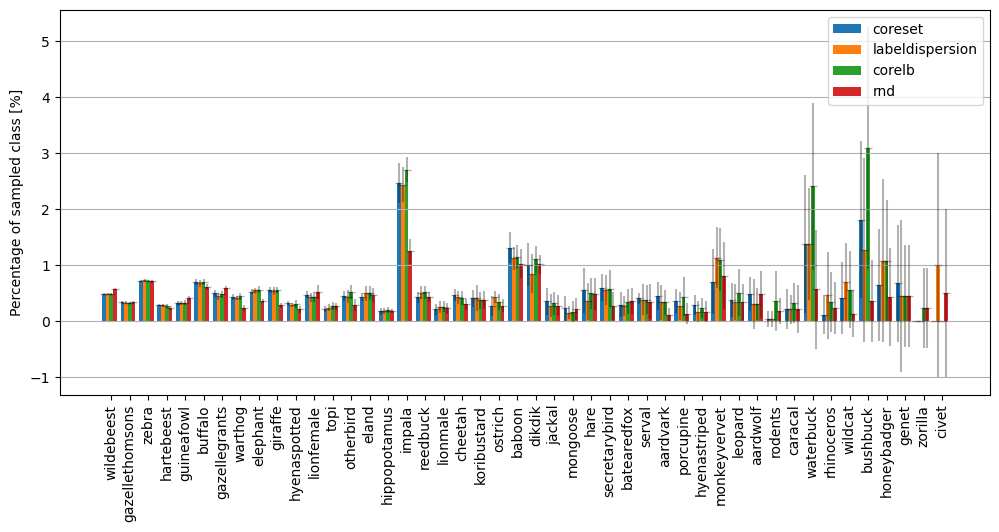

In [268]:
x = np.arange(46)
# Create the plot
fig, ax = plt.subplots(figsize=(12,5))
bar_width = np.arange(-0.4,0.6,0.2)

for i in range(len(labeled_indices.keys())):
    if name[i] == 'corelbpseudo':
        continue
    ax.bar(x + bar_width[i], labeled_indices[name[i]]['mean'][category]/num*100, width=0.2, label=name[i],log=False)
    ax.errorbar(x + bar_width[i], labeled_indices[name[i]]['mean'][category]/num*100, yerr=labeled_indices[name[i]]['std'][category]/num*100, fmt='_', color='black',alpha=0.3)
    
ax.set_xticks(x)
ax.set_xticklabels(species_name,rotation=90)
ax.set_ylabel('Percentage of sampled class [%]')
# ax.axhline(y=1, color='grey', linestyle='--')
ax.legend()
ax.grid(axis='y')

# Label dispersion indices

In [259]:
dataset = f'SnapshotSerengetiSmall'
method = f'mobyv2al'
run_id = f'20240701' # corelbpseudo 20240722, lbdisp 20240701
folder = f'{dataset}_{method}_{run_id}'
path = f'/Volumes/data01/waitsun/result_data_analysis/{folder}'

lbi = []
for i in range(10):
    with open(f'{path}/{folder}_{i}_labeldispersion_indices.pkl', 'rb') as f:
        tmp = pickle.load(f)
        lbi.append(tmp)

In [18]:
def get_label_dispersion_metric(label_dispersion_indices,exclude_true_label=True):
    sampling = []
    ADDENDUM = 2500
    for index, label_list in label_dispersion_indices.items():
        # create a dictionary with the numbers as keys and the occurence as values
        if exclude_true_label:
            label_list = label_list[1:] # ommits the first element, which is the true label
        
        occurence_dict = {i:label_list.count(i) for i in label_list}
        # sort the dictionary by the values as list of tuples. first element is the label, second the occurence
        sorted_occurence_dict = [(k, v) for k, v in sorted(occurence_dict.items(), key=lambda item: item[1],reverse=True)]
        most_common_label = sorted_occurence_dict[0][0]
        most_common_label_occurence = sorted_occurence_dict[0][1]

        # calculate the label dispersion
        label_dispersion = most_common_label_occurence/len(label_list)

        sampling.append((index,label_dispersion))

    order =sorted(sampling, key=lambda x: x[1],reverse=True)

    return order

In [238]:
# CORELBPSEUDO
for cycle in range(10):
    tmp_high_lb = get_label_dispersion_metric(lbi[cycle])
    high_lb = [i for i in tmp_high_lb if i[1] == 1]
    tmp_correct_lb = get_label_dispersion_metric(lbi[cycle], exclude_true_label=False)
    correct_lb = [i for i in tmp_correct_lb if i[1] == 1]   
    print(f'cycle {cycle} high_lb: {len(high_lb)} correct_lb: {len(correct_lb)}, diff: {len(high_lb)-len(correct_lb)}, percentage: {len(correct_lb)/len(high_lb):0.3f}')

cycle 0 high_lb: 55343 correct_lb: 53665, diff: 1678, percentage: 0.970
cycle 1 high_lb: 94498 correct_lb: 87251, diff: 7247, percentage: 0.923
cycle 2 high_lb: 131305 correct_lb: 111599, diff: 19706, percentage: 0.850
cycle 3 high_lb: 110568 correct_lb: 79840, diff: 30728, percentage: 0.722
cycle 4 high_lb: 17262 correct_lb: 2062, diff: 15200, percentage: 0.119
cycle 5 high_lb: 8481 correct_lb: 923, diff: 7558, percentage: 0.109
cycle 6 high_lb: 3516 correct_lb: 387, diff: 3129, percentage: 0.110
cycle 7 high_lb: 4877 correct_lb: 317, diff: 4560, percentage: 0.065
cycle 8 high_lb: 4047 correct_lb: 384, diff: 3663, percentage: 0.095
cycle 9 high_lb: 7071 correct_lb: 196, diff: 6875, percentage: 0.028


In [261]:
# LABEL DISPERSION
false_positive = []
for cycle in range(10):
    tmp_high_lb = get_label_dispersion_metric(lbi[cycle])
    high_lb = [i for i in tmp_high_lb if i[1] == 1]
    tmp_correct_lb = get_label_dispersion_metric(lbi[cycle], exclude_true_label=False)
    correct_lb = [i for i in tmp_correct_lb if i[1] == 1]
    false_positive.append(1-len(correct_lb)/len(high_lb))   
    print(f'cycle {cycle} high_lb: {len(high_lb)} correct_lb: {len(correct_lb)}, diff: {len(high_lb)-len(correct_lb)}, percentage: {len(correct_lb)/len(high_lb):0.3f}')

print(f'false positive: {np.mean(false_positive):0.3f} +- {np.std(false_positive):0.3f}')

cycle 0 high_lb: 49761 correct_lb: 48049, diff: 1712, percentage: 0.966
cycle 1 high_lb: 12390 correct_lb: 11507, diff: 883, percentage: 0.929
cycle 2 high_lb: 18213 correct_lb: 15095, diff: 3118, percentage: 0.829
cycle 3 high_lb: 33652 correct_lb: 31445, diff: 2207, percentage: 0.934
cycle 4 high_lb: 7043 correct_lb: 6643, diff: 400, percentage: 0.943
cycle 5 high_lb: 34229 correct_lb: 33132, diff: 1097, percentage: 0.968
cycle 6 high_lb: 39803 correct_lb: 36198, diff: 3605, percentage: 0.909
cycle 7 high_lb: 16651 correct_lb: 15751, diff: 900, percentage: 0.946
cycle 8 high_lb: 6974 correct_lb: 6483, diff: 491, percentage: 0.930
cycle 9 high_lb: 5739 correct_lb: 5443, diff: 296, percentage: 0.948
false positive: 0.070 +- 0.038


In [254]:
# snapse10
false_positive = []
for cycle in range(10):
    tmp_high_lb = get_label_dispersion_metric(lbi[cycle])
    high_lb = [i for i in tmp_high_lb if i[1] == 1]
    tmp_correct_lb = get_label_dispersion_metric(lbi[cycle], exclude_true_label=False)
    correct_lb = [i for i in tmp_correct_lb if i[1] == 1]
    false_positive.append(1-len(correct_lb)/len(high_lb))
    print(f'cycle {cycle} high_lb: {len(high_lb)} correct_lb: {len(correct_lb)}, diff: {len(high_lb)-len(correct_lb)}, percentage: {len(correct_lb)/len(high_lb):0.3f}')

print(f'false positive: {np.mean(false_positive):0.3f} +- {np.std(false_positive):0.3f}')

cycle 0 high_lb: 20830 correct_lb: 20113, diff: 717, percentage: 0.966
cycle 1 high_lb: 4674 correct_lb: 4095, diff: 579, percentage: 0.876
cycle 2 high_lb: 15987 correct_lb: 14924, diff: 1063, percentage: 0.934
cycle 3 high_lb: 11196 correct_lb: 9811, diff: 1385, percentage: 0.876
cycle 4 high_lb: 9912 correct_lb: 9654, diff: 258, percentage: 0.974
cycle 5 high_lb: 10403 correct_lb: 9675, diff: 728, percentage: 0.930
cycle 6 high_lb: 13833 correct_lb: 13286, diff: 547, percentage: 0.960
cycle 7 high_lb: 10757 correct_lb: 9138, diff: 1619, percentage: 0.849
cycle 8 high_lb: 13445 correct_lb: 13038, diff: 407, percentage: 0.970
cycle 9 high_lb: 11071 correct_lb: 10157, diff: 914, percentage: 0.917
false positive: 0.075 +- 0.042


## CoreLB

In [17]:
dataset = f'SnapshotSerengetiSmall'
method = f'mobyv2al'
run_id = f'20240629'
folder = f'{dataset}_{method}_{run_id}'
path = f'/Volumes/data01/waitsun/result_data_analysis/{folder}'

lbi = []
for i in range(10):
    with open(f'{path}/{folder}_{i}_labeldispersion_indices.pkl', 'rb') as f:
        tmp = pickle.load(f)
        lbi.append(tmp)

In [38]:
# LABEL DISPERSION
false_positive = []
hist = []
for cycle in range(10):
    tmp_high_lb = get_label_dispersion_metric(lbi[cycle])
    high_lb = [i for i in tmp_high_lb if i[1] == 1]
    t = [t[0] for t in high_lb]
    hist.append(df_train['category_id'].iloc[t].value_counts())
    tmp_correct_lb = get_label_dispersion_metric(lbi[cycle], exclude_true_label=False)
    correct_lb = [i for i in tmp_correct_lb if i[1] == 1]
    false_positive.append(1-len(correct_lb)/len(high_lb))   
    print(f'cycle {cycle} high_lb: {len(high_lb)} correct_lb: {len(correct_lb)}, diff: {len(high_lb)-len(correct_lb)}, percentage: {len(correct_lb)/len(high_lb):0.3f}')

print(f'false positive: {np.mean(false_positive):0.3f} +- {np.std(false_positive):0.3f}')

cycle 0 high_lb: 42976 correct_lb: 42088, diff: 888, percentage: 0.979
cycle 1 high_lb: 72262 correct_lb: 70090, diff: 2172, percentage: 0.970
cycle 2 high_lb: 80463 correct_lb: 79041, diff: 1422, percentage: 0.982
cycle 3 high_lb: 79112 correct_lb: 77255, diff: 1857, percentage: 0.977
cycle 4 high_lb: 101126 correct_lb: 98555, diff: 2571, percentage: 0.975
cycle 5 high_lb: 98380 correct_lb: 96878, diff: 1502, percentage: 0.985
cycle 6 high_lb: 102485 correct_lb: 100227, diff: 2258, percentage: 0.978
cycle 7 high_lb: 127907 correct_lb: 124356, diff: 3551, percentage: 0.972
cycle 8 high_lb: 123710 correct_lb: 121075, diff: 2635, percentage: 0.979
cycle 9 high_lb: 136875 correct_lb: 129308, diff: 7567, percentage: 0.945
false positive: 0.026 +- 0.011


### CORELBPSEUDO

In [55]:
dataset = f'SnapshotSerengetiSmall'
method = f'mobyv2al'
run_id = f'20240722'
folder = f'{dataset}_{method}_{run_id}'
path = f'/Volumes/data01/waitsun/result_data_analysis/{folder}'

lbi = []
for i in range(10):
    with open(f'{path}/{folder}_{i}_labeldispersion_indices.pkl', 'rb') as f:
        tmp = pickle.load(f)
        lbi.append(tmp)
# LABEL DISPERSION
false_positive = []
hist = []
df = {'index':[],'truth':[],'pred':[]}
for cycle in range(10):
    tmp_high_lb = get_label_dispersion_metric(lbi[cycle])
    high_lb = [i for i in tmp_high_lb if i[1] == 1]
    for index, lb in tmp_high_lb:
        if lb == 1:
            df['index'].append(index)
            df['truth'].append(df_train['category_id'].iloc[index])
            df['pred'].append(df_train['category_id'].iloc[lbi[cycle][index][1]])
    tmp_correct_lb = get_label_dispersion_metric(lbi[cycle], exclude_true_label=False)
    correct_lb = [i for i in tmp_correct_lb if i[1] == 1]
    t = [t[0] for t in high_lb if t not in correct_lb]
    hist.append(df_train['category_id'].iloc[t].value_counts())
    false_positive.append(1-len(correct_lb)/len(high_lb))   
    print(f'cycle {cycle} high_lb: {len(high_lb)} correct_lb: {len(correct_lb)}, diff: {len(high_lb)-len(correct_lb)}, percentage: {len(correct_lb)/len(high_lb):0.3f}')

print(f'false positive: {np.mean(false_positive):0.3f} +- {np.std(false_positive):0.3f}')

cycle 0 high_lb: 55343 correct_lb: 53665, diff: 1678, percentage: 0.970
cycle 1 high_lb: 94498 correct_lb: 87251, diff: 7247, percentage: 0.923
cycle 2 high_lb: 131305 correct_lb: 111599, diff: 19706, percentage: 0.850
cycle 3 high_lb: 110568 correct_lb: 79840, diff: 30728, percentage: 0.722
cycle 4 high_lb: 17262 correct_lb: 2062, diff: 15200, percentage: 0.119
cycle 5 high_lb: 8481 correct_lb: 923, diff: 7558, percentage: 0.109
cycle 6 high_lb: 3516 correct_lb: 387, diff: 3129, percentage: 0.110
cycle 7 high_lb: 4877 correct_lb: 317, diff: 4560, percentage: 0.065
cycle 8 high_lb: 4047 correct_lb: 384, diff: 3663, percentage: 0.095
cycle 9 high_lb: 7071 correct_lb: 196, diff: 6875, percentage: 0.028
false positive: 0.601 +- 0.387


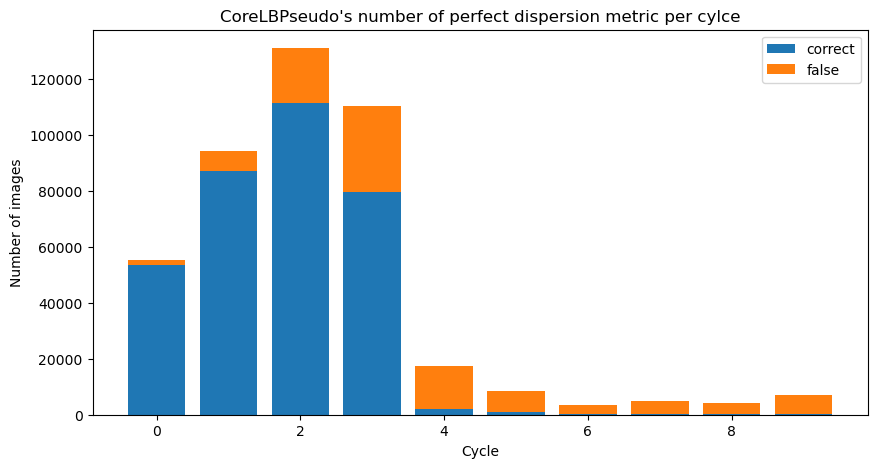

In [120]:
high_lb_clbp= [55343 ,94498 ,131305 ,110568 ,17262 ,8481 ,3516 ,4877 ,4047 ,7071]
correct_lb_clbp = [53665,87251,111599,79840,2062 ,923,387,317,384,196]
diff_clbp = [1678,7257,19606,30728,15200,7558,3129,4560,3663,6875]
percentage_clpb = [0.970,0.923,0.850,0.722,0.119,0.109,0.110,0.065,0.095,0.028]

high_lb_lb = [42976,72262,80463,79112,101126,98380,102485,127907,123710,136875]
correct_lb_lb = [42088,70090,79041,77255,98555,96878,100227,124356,121075,129308]
diff_lb = [888,2172,1422,1857,2571,1502,2258,3551,2635,7567]
percentage_lb = [0.979,0.970,0.982,0.977,0.975,0.985,0.978,0.972,0.979,0.945]

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(np.arange(10),correct_lb_clbp,label='correct')
ax.bar(np.arange(10),diff_clbp,label='false',bottom=correct_lb_clbp,)

# for i in np.arange(10):
#     height = high_lb_clbp[i]
#     plt.text(i, height, f'{percentage_clpb[i]:.3f}', ha='center', va='bottom')

ax.legend()
ax.set_title('CoreLBPseudo\'s number of perfect dispersion metric per cylce')
ax.set_ylabel('Number of images')
ax.set_xlabel('Cycle')
plt.savefig('plots/corelbpseudo_label_dispersion.png',bbox_inches='tight')

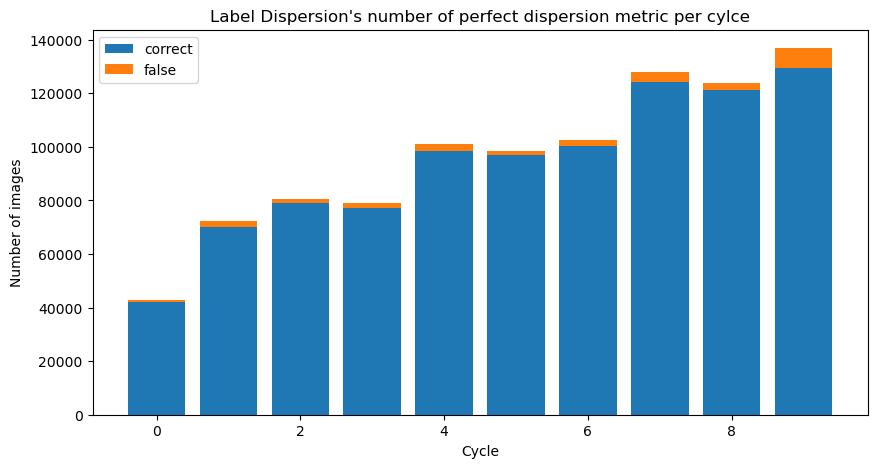

In [119]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(np.arange(10),correct_lb_lb,label='correct')
ax.bar(np.arange(10),diff_lb,label='false',bottom=correct_lb_lb,)

# for i in np.arange(10):
#     height = high_lb_lb[i]
#     plt.text(i, height, f'{percentage_lb[i]:.3f}', ha='center', va='bottom')

ax.legend()
ax.set_title('Label Dispersion\'s number of perfect dispersion metric per cylce')
ax.set_ylabel('Number of images')
ax.set_xlabel('Cycle')
plt.savefig('plots/label_dispersion_label_dispersion.png',bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


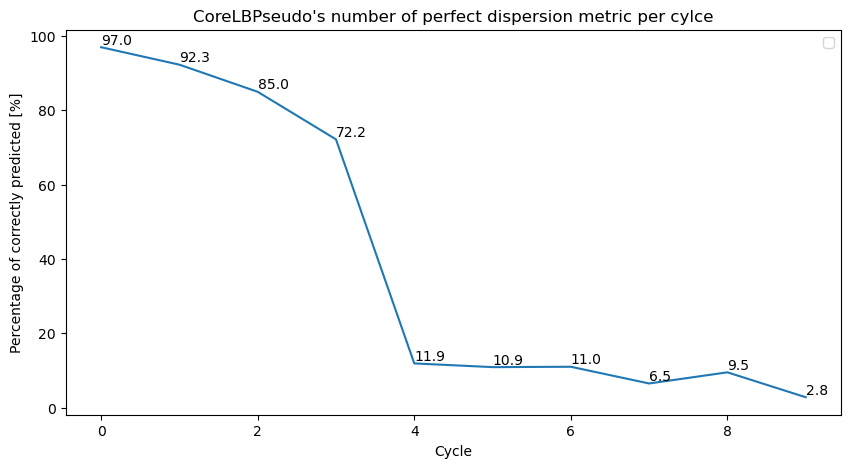

In [118]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(10),[p * 100 for p in percentage_clpb])

for i in np.arange(10):
    height = percentage_clpb[i]*100
    plt.text(i, height, f'{percentage_clpb[i]*100:.1f}', ha='left', va='bottom')

ax.legend()
ax.set_title('CoreLBPseudo\'s number of perfect dispersion metric per cylce')
ax.set_ylabel('Percentage of correctly predicted [%]')
ax.set_xlabel('Cycle')
plt.savefig('plots/corelbpseudo_label_dispersion_percentage.png',bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


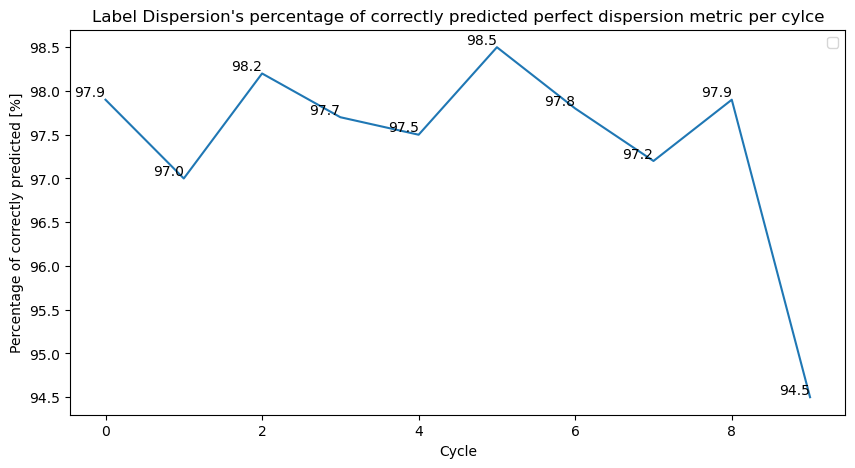

In [117]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(10),[p * 100 for p in percentage_lb])

for i in np.arange(10):
    height = percentage_lb[i]*100
    plt.text(i, height, f'{percentage_lb[i]*100:.1f}', ha='right', va='bottom')

ax.legend()
ax.set_title('Label Dispersion\'s percentage of correctly predicted perfect dispersion metric per cylce')
ax.set_ylabel('Percentage of correctly predicted [%]')
ax.set_xlabel('Cycle')
plt.savefig('plots/label_dispersion_label_dispersion_percentage.png',bbox_inches='tight')

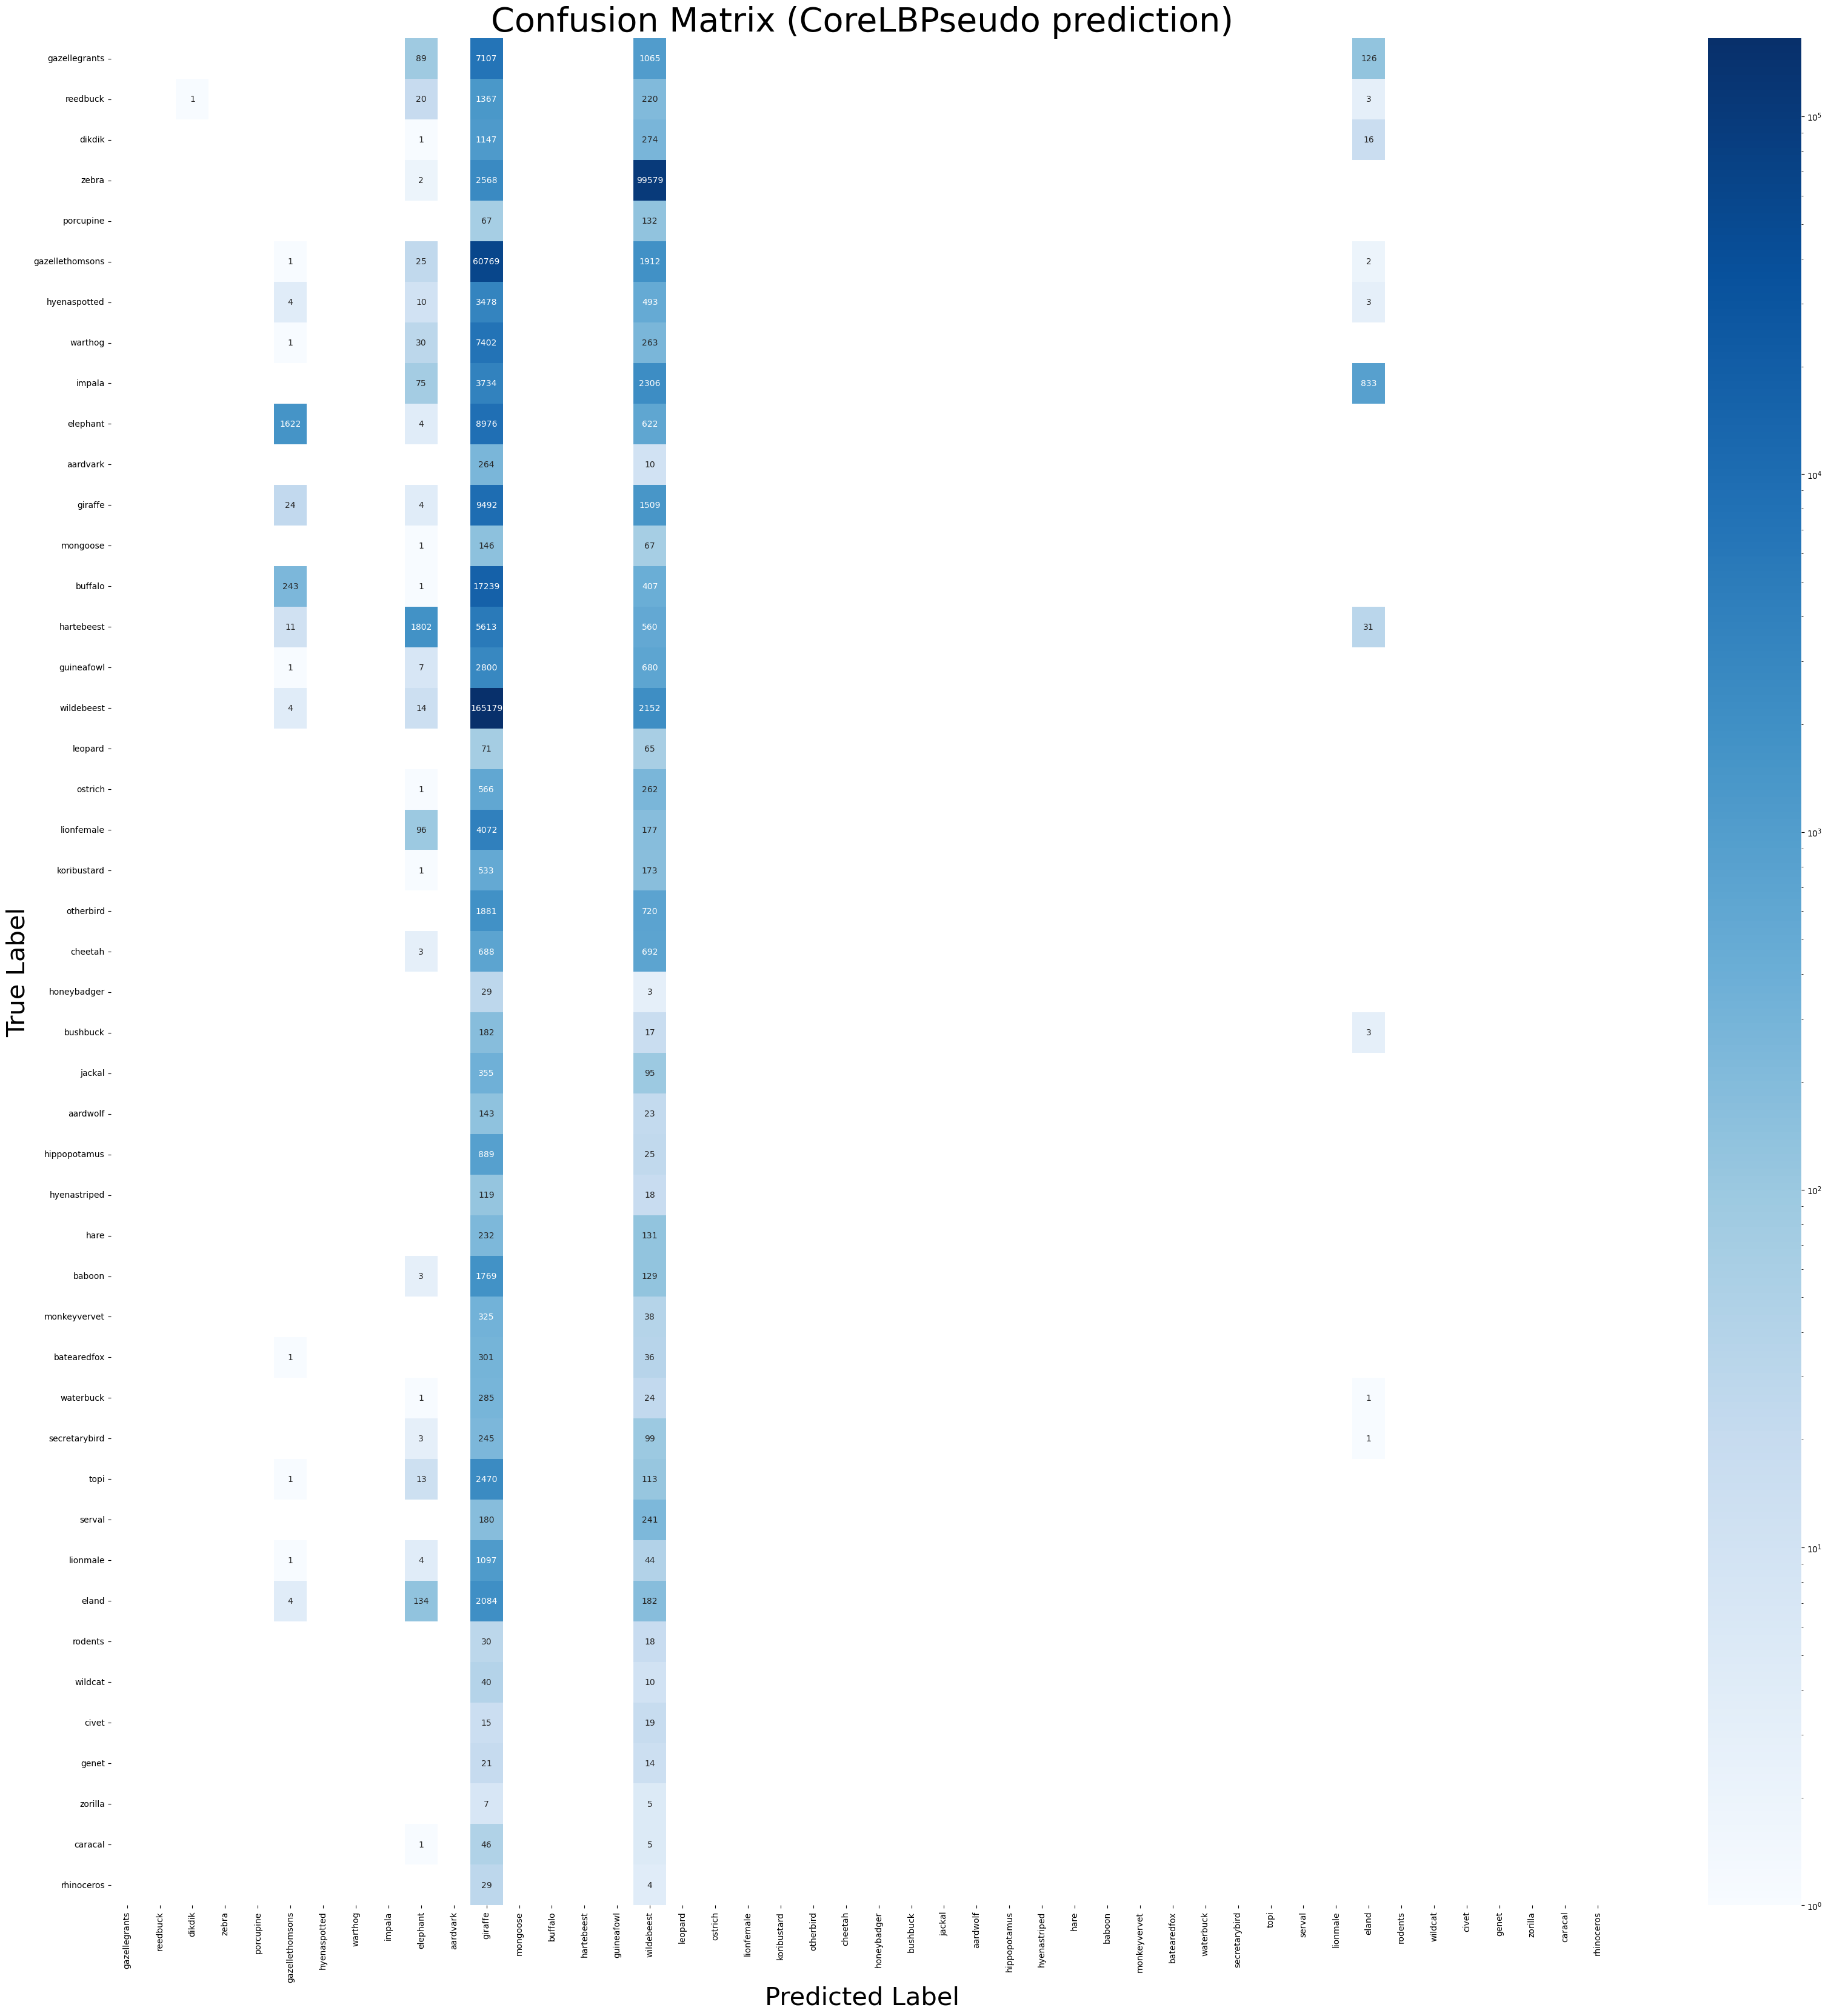

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

df_results = pd.DataFrame(df)

cm = confusion_matrix(df_results['truth'],df_results['pred'])
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            norm=LogNorm(),xticklabels=lut.name[:46], yticklabels=lut.name[:46])
plt.xlabel('Predicted Label', fontsize=30)
plt.ylabel('True Label', fontsize=30)
plt.title('Confusion Matrix (CoreLBPseudo prediction)', fontsize=40)
plt.savefig('plots/confusion_matrix.png', bbox_inches='tight')
plt.show()